<a href="https://colab.research.google.com/github/SnekhaB/E-Commerce_Customer_Segmentation/blob/main/E_Commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What we want to achieve?**

Segment the customers based on RFM so that the company can target its customers efficiently.

**R(Recency): Numbers of days since last purchase**

**F(Frequency) : Number of transactions**

**M(Monetary) : Total amount of transactions**

# **Importing the Data**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/content/e_Comm_data.csv",encoding = ' windows-1252')

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Understand the data**

In [5]:
data.shape

(541909, 8)

**There are 8 columns and 541909 rows**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Here we can clearly see that Description and customerID column have missing values**

In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**I guess Quantity may have outliers.Because quantity has negative values.**

In [8]:
data.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

# **Data Cleaning**

### **Checking and Handling missing values**

In [9]:
round((data.isnull().sum())/len(data)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [10]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
pd.DataFrame(data.isnull().mean()*100)

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


**"We can see that 'description' and 'customerid' have missing values, and we are attempting to drop those rows."**

In [12]:
data = data.dropna()
data.shape

(406829, 8)

**"After removing missing values, the shape of the dataset has been reduced to 406,829."**

In [13]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
data.InvoiceNo.value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: InvoiceNo, Length: 22190, dtype: int64

In [15]:
#len(data[data['InvoiceNo'].str.startswith('C')])

In [16]:
#data = data[~data['InvoiceNo'].str.startswith('C')]

In [17]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
data.Quantity.value_counts().nunique()


104

In [19]:
(data.Quantity <= 0).sum()


8905

In [20]:
(data.UnitPrice <= 0).sum()

40

In [21]:
data=data[(data['UnitPrice']!=0) & (data['Quantity']>0)]

In [22]:
(data.UnitPrice <= 0).sum()

0

In [23]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


**Quantity and Unit price can't be zero.So we can delete those rows**

## **Drop the duplicates**

In [24]:
data = data.drop_duplicates()
data.shape

(392692, 8)

**After dropping duplicates again dataset has been reduced to 401604**

## **Format the data type**

In [25]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [26]:
data['CustomerID'] = data['CustomerID'].astype(str)

In [27]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

**Corrected the data type of CustomerID**

## **Adding new columns(Derived Attribute)**

In [28]:
#New attribute for monetary
data['Amount'] = data['Quantity']*data['UnitPrice']


In [29]:
data_mon = data.groupby('CustomerID')['Amount'].sum()
data_mon = data_mon.reset_index()
data_mon.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [30]:
#New attribute for Frequency
data_fre = data.groupby('CustomerID')['InvoiceNo'].count()
data_fre = data_fre.reset_index()
data_fre.columns = ['CustomerID','Frequency']
data_fre

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


In [31]:
rfm = pd.merge(data_mon,data_fre,on = 'CustomerID',how = 'inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [32]:
rfm.describe()

,Amount,Frequency
count,4338.000000,4338.000000
mean,2048.688081,90.523744
std,8985.230220,225.506968
min,3.750000,1.000000
25%,306.482500,17.000000
50%,668.570000,41.000000
75%,1660.597500,98.000000
max,280206.020000,7676.000000


In [33]:
rfm.Amount.value_counts()

76.32      4
35.40      3
363.65     3
15.00      3
440.00     3
          ..
477.79     1
1530.75    1
605.06     1
183.85     1
1837.28    1
Name: Amount, Length: 4256, dtype: int64

In [34]:
#New Attribute : Recency
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392692, dtype: datetime64[ns]

In [35]:
# Compute the maximum date to know the last transaction date
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [36]:
#Compute the difference between last/max transaction and actual transaction date
data['Diff'] = max_date - data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [37]:
#Compute recency of customer
data_rec = data.groupby('CustomerID')['Diff'].min()
data_rec = data_rec.reset_index()
data_rec.head()

,CustomerID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [38]:
data_rec['Diff'] = data_rec['Diff'].dt.days


In [39]:
data_rec.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [40]:
#rfm.rename(columns={'Amount': 'Amount', 'Frequency': 'Frequency'}, inplace=True)


In [41]:
#Merge all the dataframes to get the Final RFM
rfm = pd.merge(rfm, data_rec, on = 'CustomerID', how ='inner')
rfm.columns = ['CustomerID','Amount','Frequency','Recency']

In [42]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


## **To Check and Remove Outliers**

Text(0, 0.5, 'Attributes')

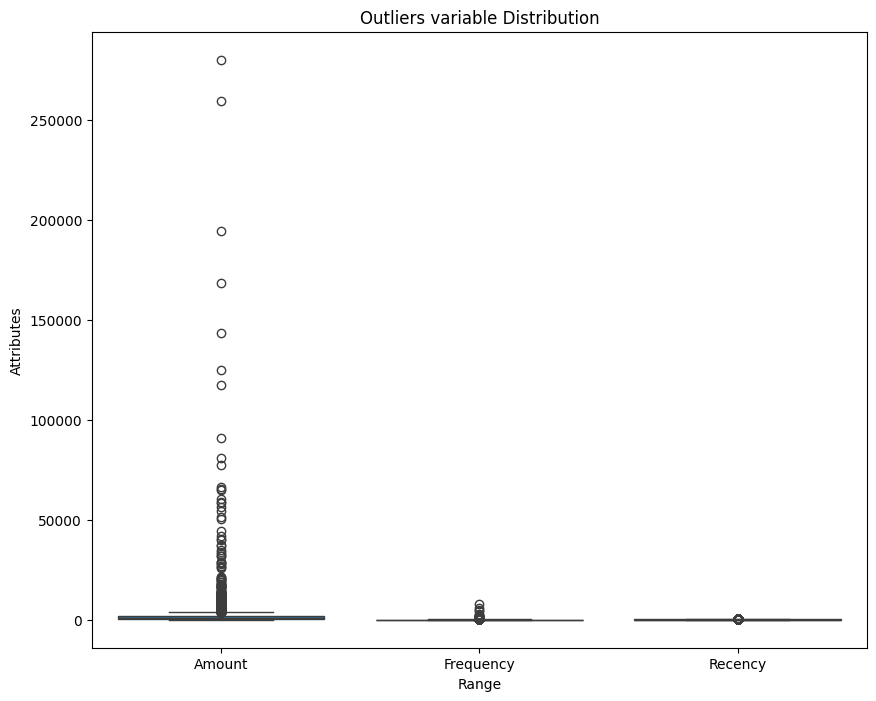

In [43]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data= rfm[attributes])
plt.title('Outliers variable Distribution')
plt.xlabel('Range')
plt.ylabel('Attributes')

In [44]:
q1_amo = rfm.Amount.quantile(0.25)
q3_amo= rfm.Amount.quantile(0.75)
iqr_amo= q3_amo - q1_amo

low_amo = q1_amo - 1.5 * iqr_amo
high_amo = q3_amo + 1.5 * iqr_amo

print(low_amo)
print(high_amo)

-1724.6899999999996
3691.7699999999995


In [45]:
rfm['Amount'] = rfm.Amount.clip(low_amo,high_amo)

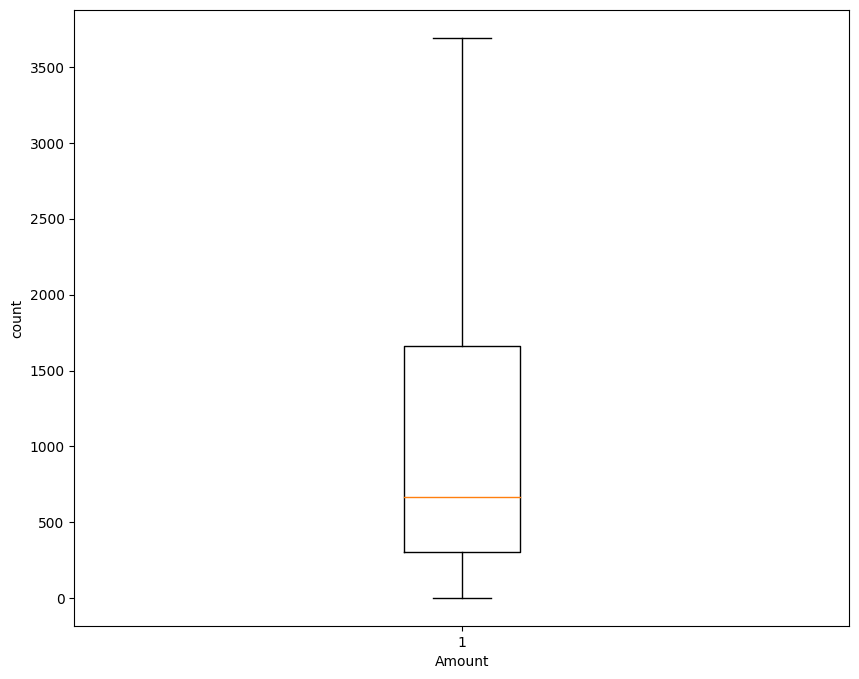

In [46]:
# Create a box plot
plt.boxplot(rfm['Amount'])

# Adding labels and title
plt.xlabel('Amount')
plt.ylabel('count')

# Show the plot
plt.show()

In [47]:
q1_fre = rfm.Frequency.quantile(0.25)
q3_fre = rfm.Frequency.quantile(0.75)
iqr_fre = q3_fre - q1_fre


low_fre = q1_fre - 1.5 * iqr_fre
high_fre = q3_fre + 1.5 * iqr_fre

print(low_fre)
print(high_fre)

-104.5
219.5


In [48]:
rfm.Frequency = rfm.Frequency.clip(low_fre,high_fre)

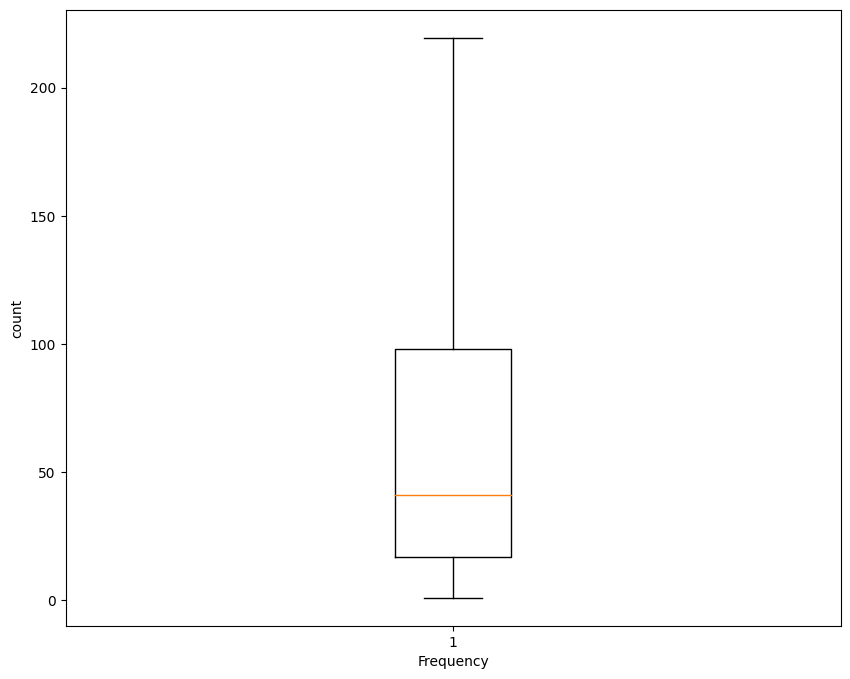

In [49]:
plt.boxplot(rfm['Frequency'])

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('count')

# Show the plot
plt.show()

In [50]:
q1_rec = rfm.Recency.quantile(0.25)
q3_rec = rfm.Recency.quantile(0.75)
iqr_rec = q3_rec - q1_rec


low_rec = q1_rec - 1.5 * iqr_rec
high_rec = q3_rec + 1.5 * iqr_rec

print(low_rec)
print(high_rec)


-169.0
327.0


In [51]:
rfm.Recency = rfm.Recency.clip(low_rec,high_rec)

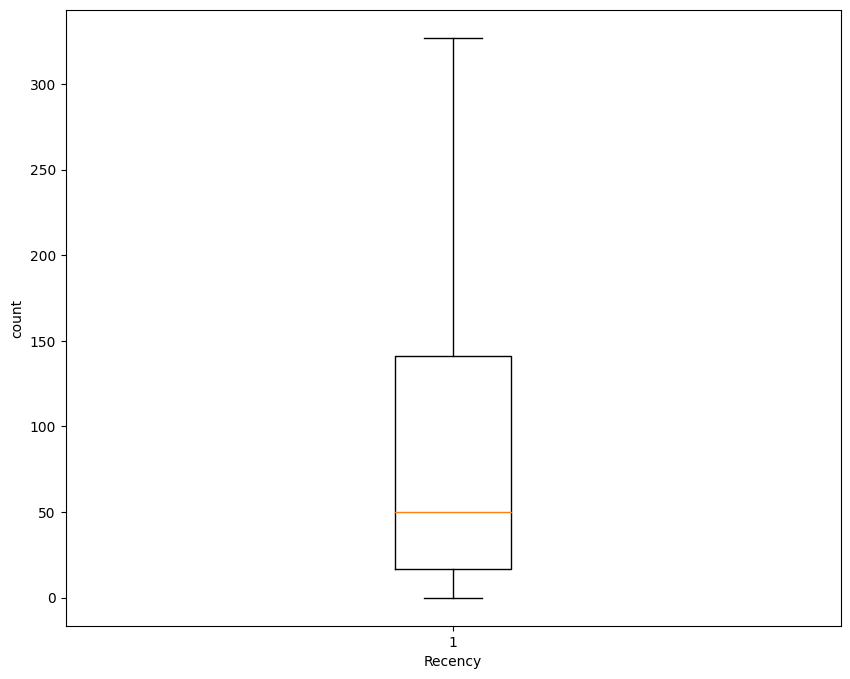

In [52]:
plt.boxplot(rfm['Recency'])

# Adding labels and title
plt.xlabel('Recency')
plt.ylabel('count')


# Show the plot
plt.show()




In [53]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,3691.77,1.0,325
1,12347.0,3691.77,182.0,1
2,12348.0,1797.24,31.0,74
3,12349.0,1757.55,73.0,18
4,12350.0,334.40,17.0,309
...,...,...,...,...
4333,18280.0,180.60,10.0,277
4334,18281.0,80.82,7.0,180
4335,18282.0,178.05,12.0,7
4336,18283.0,2045.53,219.5,3


In [54]:
rfm.describe()

,Amount,Frequency,Recency
count,4338.000000,4338.000000,4338.000000
mean,1159.010762,67.992047,90.447441
std,1146.777473,67.267229,97.199547
min,3.750000,1.000000,0.000000
25%,306.482500,17.000000,17.000000
50%,668.570000,41.000000,50.000000
75%,1660.597500,98.000000,141.000000
max,3691.770000,219.500000,327.000000


# **Data Preprocessing**

## **Scaling the features**

In [56]:
rfm_df = rfm[['Amount','Frequency','Recency']]

ss = StandardScaler()

rfm_scaled = ss.fit_transform(rfm_df)
rfm_scaled.shape

(4338, 3)

In [57]:
rfm_scaled_df = pd.DataFrame(rfm_scaled)
rfm_scaled_df.columns =['Amount','Frequency','Recency']
rfm_scaled_df

,Amount,Frequency,Recency
0,2.208843,-0.996024,2.413382
1,2.208843,1.695047,-0.920352
2,0.556606,-0.549990,-0.169233
3,0.521992,0.074457,-0.745433
4,-0.719151,-0.758139,2.248753
...,...,...,...
4333,-0.853281,-0.862214,1.919495
4334,-0.940300,-0.906817,0.921433
4335,-0.855505,-0.832478,-0.858616
4336,0.773142,2.252589,-0.899773


## **Model Building**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

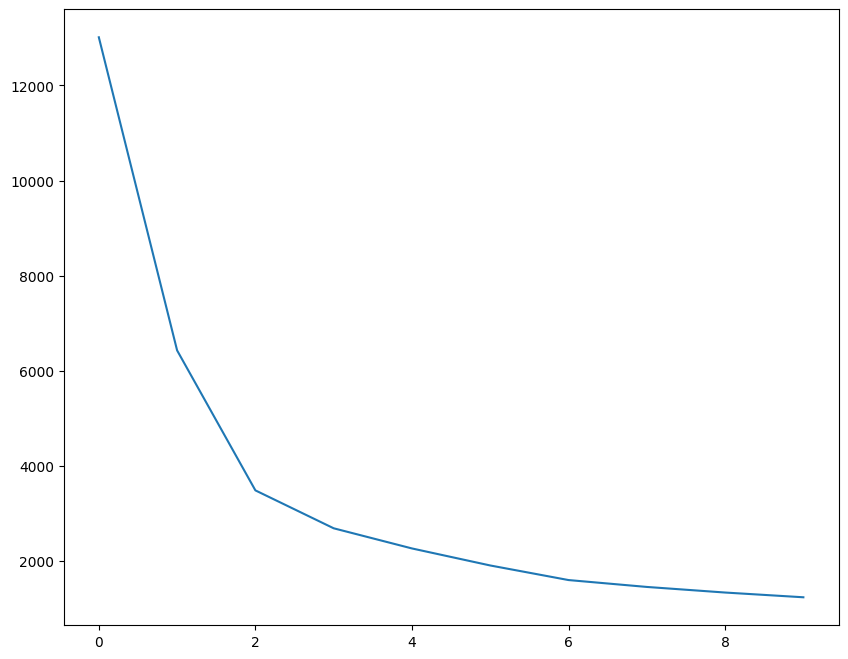

In [59]:
inertia = []

for i in np.arange(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(rfm_scaled_df)

  inertia.append(kmeans.inertia_)

plt.plot(inertia)

In [60]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [61]:
rfm['clusters'] = (kmeans.labels_)

In [62]:
#rfm['cluster_id'] = kmeans.predict(rfm_scaled_df)
rfm

,CustomerID,Amount,Frequency,Recency,clusters
0,12346.0,3691.77,1.0,325,2
1,12347.0,3691.77,182.0,1,1
2,12348.0,1797.24,31.0,74,0
3,12349.0,1757.55,73.0,18,0
4,12350.0,334.40,17.0,309,2
...,...,...,...,...,...
4333,18280.0,180.60,10.0,277,2
4334,18281.0,80.82,7.0,180,2
4335,18282.0,178.05,12.0,7,0
4336,18283.0,2045.53,219.5,3,1


In [63]:
group = rfm.groupby(['clusters'])['Amount',	'Frequency',	'Recency'].mean()
group

<ipython-input-63-6ad96d480acc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = rfm.groupby(['clusters'])['Amount',	'Frequency',	'Recency'].mean()


,Amount,Frequency,Recency
clusters,,,
0,723.439299,44.061055,48.034453
1,2915.745509,167.892928,27.573705
2,424.143977,24.354467,244.509126


<Axes: xlabel='clusters', ylabel='Amount'>

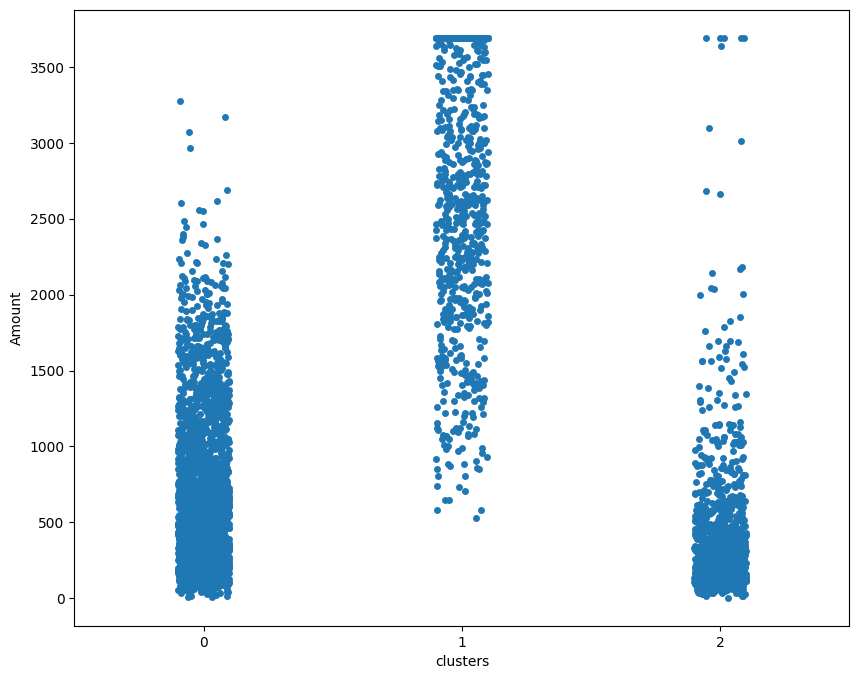

In [64]:
sns.stripplot(x = 'clusters' , y = 'Amount', data = rfm)

<Axes: xlabel='clusters', ylabel='Frequency'>

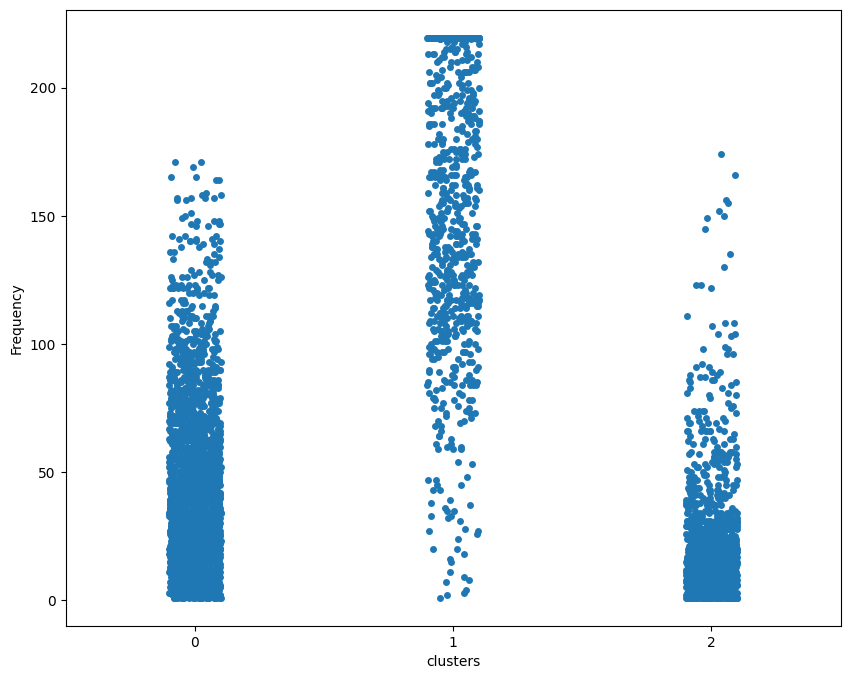

In [65]:
sns.stripplot(x = 'clusters' , y = 'Frequency', data = rfm)

<Axes: xlabel='clusters', ylabel='Recency'>

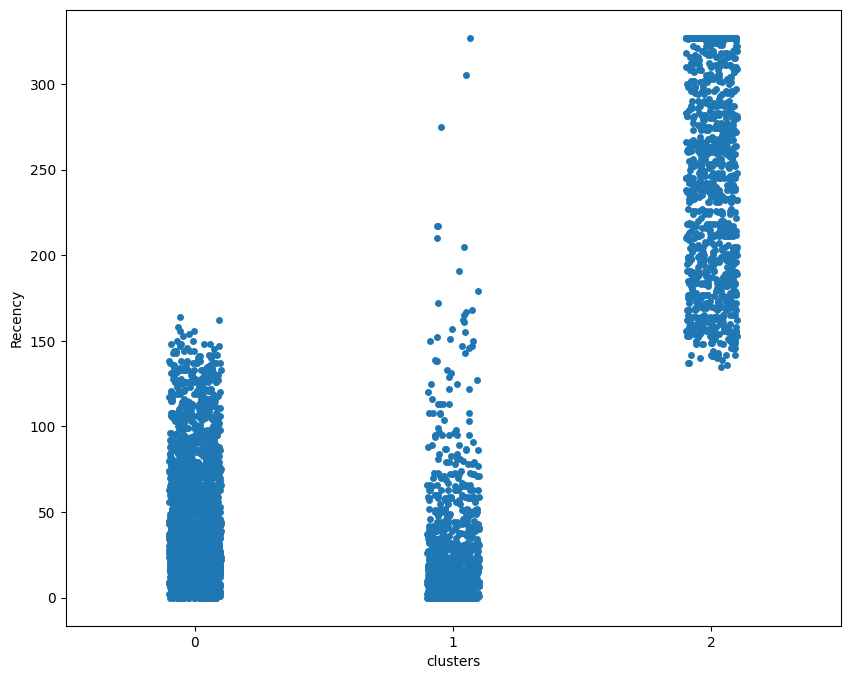

In [66]:
sns.stripplot(x = 'clusters' , y = 'Recency', data = rfm)

In [67]:
def func(row):
  if row['clusters'] == 0:
    return 'lapsed cx'
  elif row['clusters'] == 1:
    return 'whales'
  else:
    return 'avg cx'


In [68]:
rfm['conditions'] = rfm.apply(func,axis=1)

In [69]:
rfm

,CustomerID,Amount,Frequency,Recency,clusters,conditions
0,12346.0,3691.77,1.0,325,2,avg cx
1,12347.0,3691.77,182.0,1,1,whales
2,12348.0,1797.24,31.0,74,0,lapsed cx
3,12349.0,1757.55,73.0,18,0,lapsed cx
4,12350.0,334.40,17.0,309,2,avg cx
...,...,...,...,...,...,...
4333,18280.0,180.60,10.0,277,2,avg cx
4334,18281.0,80.82,7.0,180,2,avg cx
4335,18282.0,178.05,12.0,7,0,lapsed cx
4336,18283.0,2045.53,219.5,3,1,whales


In [70]:
result = rfm['conditions'].value_counts()
result

lapsed cx    2293
avg cx       1041
whales       1004
Name: conditions, dtype: int64

<Axes: >

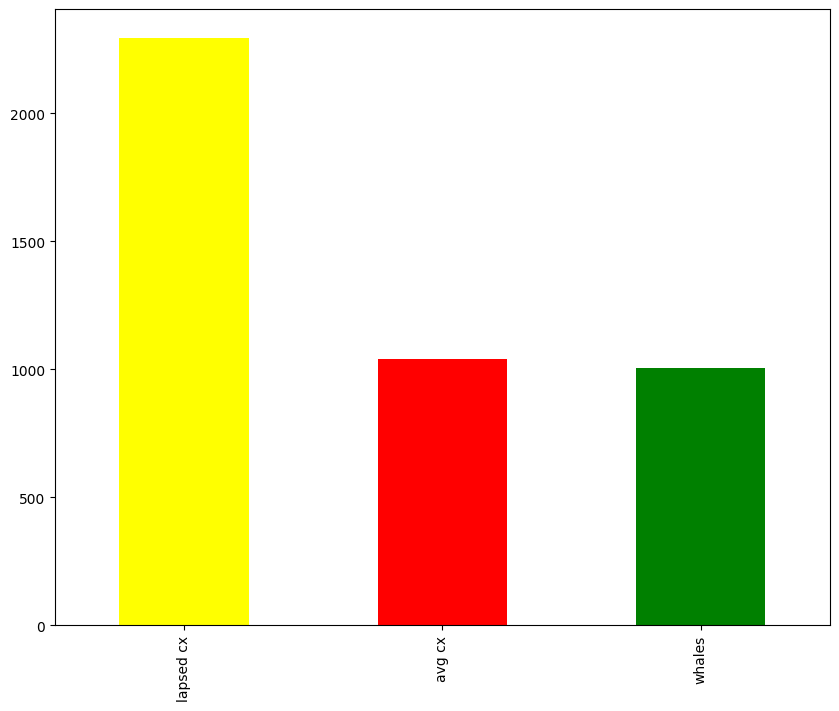

In [71]:
result.plot(kind='bar', color = ['yellow','red','green'])